# Course-1: Python for Data Systems (Project): FoodHub Data Analysis

**Marks: 40**

### BY THOMAS NOWAKOWSKI - COHORT IN US, STARTING TIME IN JANUARY, PROGRAM MANAGER SHAURIA SHARMA

## Project Overview:

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

## Descriptive Analysis

### Import the required libraries

In [215]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library to scrape the table from the webpage
from bs4 import BeautifulSoup

# import library for regular expressions
import re

### Question 1: Write the code to scrape the table from the 'foodhub_order.html' and read the data. (0.5 mark)

In [216]:
# Write the code here
with open ("foodhub_orders.html",'r') as f:   # scrapping
    soup =BeautifulSoup(f) # reading scraped data into variable soup


In [217]:
# read the data ( have a look at the code to prepare for further analysis
# print(soup.prettify())
# FOR THE  SUBMISSION I HAVE TAKEN THE  PRINT COMMAND OUT BECAUSE ITS TOO LENGTHY- PRODUCES 
#  TOO MANY UNNESSESASARY pdf PAGES

#### Observations:
The file name is ...orders.html not ..order.html .. 
Scaping worked fine  no error
Visual inspection of the file using prettify() against inspect view of HTML confirm the data has been read and contains corresponding values. ( I checked 3 fields and values are consistent in both HTML and soup variable printed above


### **Question 2:** Get the shape of the dataset (no. of rows and columns) in the form of a tuple (0.5 mark)

In [218]:
# get all the column names, variables contained in each order
columns = soup.select('thead th')
#columns = [x.attrs["title"] for x in columns] #- trying to extract just the column name
columns

[<th title="Field #1">order_id</th>,
 <th title="Field #2">customer_id</th>,
 <th title="Field #3">restaurant_name</th>,
 <th title="Field #4">cuisine_type</th>,
 <th title="Field #5">cost_of_the_order</th>,
 <th title="Field #6">day_of_the_week</th>,
 <th title="Field #7">rating</th>,
 <th title="Field #8">food_preparation_time</th>,
 <th title="Field #9">delivery_time</th>]

In [219]:
# check the number of columns
len (columns)

9

In [220]:
# strip out the text and show a pute list of columns
pages = soup.select('thead th')
pages = [x.text.strip() for x in pages]
pages

['order_id',
 'customer_id',
 'restaurant_name',
 'cuisine_type',
 'cost_of_the_order',
 'day_of_the_week',
 'rating',
 'food_preparation_time',
 'delivery_time']

In [221]:
# get all the records that contain information and store into one variable
records= soup.select('tbody tr')


In [222]:
# check the number of records
len(records)

1898

In [223]:
# examine a single  record
records[1]

<tr>
<td align="right">1477685</td>
<td align="right">358141</td>
<td>Blue Ribbon Sushi Izakaya</td>
<td>Japanese</td>
<td align="right">12.08</td>
<td>Weekend</td>
<td>Not given</td>
<td align="right">25</td>
<td align="right">23</td>
</tr>

In [224]:
# extract data for a single record and visually check the results
#records[1].findAll('td')[0].text
print ('order_id is',records[1].findAll('td')[0].text)
print ('customer_id is',records[1].findAll('td')[1].text)
print ('restaurant_name is',records[1].findAll('td')[2].text)
print ('cousine_type is',records[1].findAll('td')[3].text)
print ('cost_of_order is',records[1].findAll('td')[4].text)
print ('day_of_the_week is',records[1].findAll('td')[5].text)
print ('rating is',records[1].findAll('td')[6].text)
print ('food_preparation_time is',records[1].findAll('td')[7].text)
print ('delivery_time is',records[1].findAll('td')[8].text)


order_id is 1477685
customer_id is 358141
restaurant_name is Blue Ribbon Sushi Izakaya
cousine_type is Japanese
cost_of_order is 12.08
day_of_the_week is Weekend
rating is Not given
food_preparation_time is 25
delivery_time is 23


In [225]:
# now that we checked extraction for 1 record 
# loop through to pick up all the data into varables and append them
data=[] # this is where we will add the rows
skip_count=0

for record in records :
    try:
        order_id = record.findAll('td')[0].text
        customer_id = record.findAll('td')[1].text
        restaurant_name = record.findAll('td')[2].text
        cousine_type = record.findAll('td')[3].text
        cost_of_order = record.findAll('td')[4].text
        day_of_the_week = record.findAll('td')[5].text
        rating = record.findAll('td')[6].text
        food_prep_time = record.findAll('td')[7].text
        delivery_time = record.findAll('td')[8].text
        data.append([order_id,customer_id,restaurant_name,cousine_type,cost_of_order,day_of_the_week,rating,food_prep_time,delivery_time])
    
    except:
        skip_count += 1
        pass
    
if skip_count==0:
    print("All records processed successfully!")
else:
    print(f"{skip_count} records have been skipped as some data points were missing")


All records processed successfully!


In [226]:
# prepare to make a dataframe from extracted data
# create column names for dataframe 
df_columns=["order_id","customer_id","restaurant_name","cousine_type","cost_of_order","day_of_the_week","rating","food_prep_time","delivery_time"]


In [227]:
# create the  dataframe from scrapped data
df=pd.DataFrame(data=data,columns=df_columns)

In [228]:
# look at dataframe 
df.tail(4)

,order_id,customer_id,restaurant_name,cousine_type,cost_of_order,day_of_the_week,rating,food_prep_time,delivery_time
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


## Finally answer question 2- shape of dataframe

In [229]:
print(f"The number of rows in the scrapped Dataframe are {df.shape[0]}")
print(f"The number of columns in the scrapped Dataframe are {df.shape[1]}")

The number of rows in the scrapped Dataframe are 1898
The number of columns in the scrapped Dataframe are 9


### Question 3: Use the info() to get a detailed description of the dataframe's metadata, and note your observations (0.5 mark)

In [230]:
# Write the code here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   order_id         1898 non-null   object
 1   customer_id      1898 non-null   object
 2   restaurant_name  1898 non-null   object
 3   cousine_type     1898 non-null   object
 4   cost_of_order    1898 non-null   object
 5   day_of_the_week  1898 non-null   object
 6   rating           1898 non-null   object
 7   food_prep_time   1898 non-null   object
 8   delivery_time    1898 non-null   object
dtypes: object(9)
memory usage: 133.6+ KB
None


#### Observations:

All the data types in the newly created dataframe from scraped data are of type object...
We must convert the data into appropriate categories for further processing

It appears there is no missing data according to Non-Null count

### Question 4: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Convert the mentioned features to 'category' and write your observations (0.5 mark)

In [231]:
# Write the code here
# lets look at the number of categories
print (" Number of cousine categories are", df.cousine_type.nunique())
print (" Number of Restaurants participating are",df.restaurant_name.nunique())
print (" Categories of days of the week are",df.day_of_the_week.nunique())


 Number of cousine categories are 14
 Number of Restaurants participating are 178
 Categories of days of the week are 2


In [232]:
# number of restaurants is huge, I would see it more as a string rather than category but... here is the change as requested
# name of a restaurant is not a category, but type of cousine would be
# Dear Teacher, what are the criteria we use to change columns to category ?

df.cousine_type = df.cousine_type.astype('category')
df.restaurant_name = df.restaurant_name.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')

#### Observations:


In [233]:
# to perform numerical analysys as well as visual analysis we should also change columns that should be numberical so that 
# we can also propery apply visualisation techniques of univariate and bivariate analysis

df.cost_of_order = df.cost_of_order.astype('float')# because value is given with a decimal
df.delivery_time = df.delivery_time.astype('int')
df.food_prep_time= df.food_prep_time.astype('int')

In [234]:
# ratings 
# this one has to be treated  differently because of the many  "strings" of "not given" and hence can not be turned into
# a numerical column immediately.We will have to apply missing value treatment ... 
# enother idea is to accept" not rated" as a category and show statistically how many clients do not rate as a valid imput
df.rating= df.rating.astype('category')

### Note
#order number has no impact on anything and is usless  for statistical analysis ...
#less is more,I am going to drop the  clutter

but as I found below after attempting some questions below, I will need this var so I kept the code for exercise but made the cell a markdown

df.drop("order_id",axis=1,inplace=True)

In [235]:
# lets have a look at the Dataframe after changes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   order_id         1898 non-null   object  
 1   customer_id      1898 non-null   object  
 2   restaurant_name  1898 non-null   category
 3   cousine_type     1898 non-null   category
 4   cost_of_order    1898 non-null   float64 
 5   day_of_the_week  1898 non-null   category
 6   rating           1898 non-null   category
 7   food_prep_time   1898 non-null   int32   
 8   delivery_time    1898 non-null   int32   
dtypes: category(4), float64(1), int32(2), object(2)
memory usage: 75.1+ KB


### **Question 5:** Find the summary statistics of the numeric columns and write your observations (0.5 mark)

In [236]:
# Write the code here
df.describe().T


,count,mean,std,min,25%,50%,75%,max
cost_of_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_prep_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations - numerical columns
The max and min for  the numercal data is reasonable,dispersion (max-min) being fairly small, hence and there are no extreme outliers to the naked eye. I will of  course check  this using 1.5IQR with a box plot later

The Standard Diviation seems very small, particularly for food_prep_time and delivery_time, meaning its very consistent and there is little variation (variance  happens to be in same units, minutes for both so it can be compared)




## Observations - Categorical columns
lets us have a look at the categorical columns summary statistic
best way to do that is to have a look at the  frequency distribution per category, and determine if there is any much more frequented categories

In [237]:
# lets us have a look at the categorical columns summary statistic
# best way to do that is to have a look at the  frequency distribution per category

#RESTAURANTS
print (df['restaurant_name'].value_counts(normalize=True))

# from the output below- clearly #Shake Shack is by far most frequent supplier of food with over 11% of total orders filled
# other significant ones  of over 5% are :
                                            # The MeatBall Shop
                                            # Blue Ribbon Sushi
                                            # Blue Ribbon Fried Chicken

Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Klong                        0.000527
Kambi Ramen House            0.000527
Il Bambino                   0.000527
Hunan Manor                  0.000527
Lamarca Pasta                0.000527
Name: restaurant_name, Length: 178, dtype: float64


In [238]:
print(df['restaurant_name'].value_counts().head()) # another way to look at it

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


# Cousine Type
df['cousine_type']. value_counts(normalize=True) 

# Clearly the top 4 categories of food that each represent over 10% of volume are  :
                                    # American
                                    # Japanese
                                    # Italian
                                    # Chinese

In [239]:
# Day of the Week
df['day_of_the_week'].value_counts(normalize=True) 

# Although there are more weekdays than weekend days, Weekend clearly shows a lot more delivery orders - 71% of volume

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

In [240]:
# Rating
df['rating'].value_counts(normalize=True) 

# while most orders do not have a  rating 38%, of the ratings given 5 is the  majority score with 31% of observations

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [241]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### **Question 6:** How many orders are not rated? (0.5 mark)

In [260]:
# Non Rated Orders method # 1
# IMPORTANT, ISIN CAN ONLY BE APPLIED TO A TUPLE OR SERIES NOT TO A DATA FRAME- SINGLE COLUMN ONLY
# IF WE WANT TO APPLY ISIN ONE MUST GIVE COLUMN NAME OR IF SAVING MUST MAKE THE SAVE INTO A COLUMN AS FOLLOWS 
# rest_name= df[df['rating']>50]["rest_name"] this last bit makes it a series that what its there for ...


total_orders = df['rating'].count()                 # Total number of orders in dataset
non_rated=df['rating'].isin(["Not given"]).sum()    # Total number of non rated orders

print(" The number of non rated orders are  {} and that  represents {:.2f}% of total.".format(non_rated,non_rated/total_orders*100))


 The number of non rated orders are  736 and that  represents 38.78% of total.


In [243]:
# Non Rated Orders method # 2
count=0
for i in df["rating"]:
    if i=="Not given":
        count+=1
print ("The total number of ratings is {}, out of which {} are not rated, or {:.2f}%".format(df.shape[0],count,count/df.shape[0]*100))

The total number of ratings is 1898, out of which 736 are not rated, or 38.78%


#### Observations:

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 7:** Explore all the variables individually and provide your observations - look for count, unique values, distributions (5 marks)

In [244]:
# lots of this has been done already by chance above

# Lets get a list of columns to explore
columns=df.columns
columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cousine_type',
       'cost_of_order', 'day_of_the_week', 'rating', 'food_prep_time',
       'delivery_time'],
      dtype='object')

In [245]:
# order_id & customer_id
# these variable provides little in terms of exploratory analysis
# they will have to be unique, count will be same as all rows, its distribution flat
# I will skip these vars as they  can not add any value to EDA


In [246]:
# Restaurant name
print (" The number of unique restaurants that are part of Food Hub are ", df["restaurant_name"].nunique())
# Too many restaurants to make a list

 The number of unique restaurants that are part of Food Hub are  178


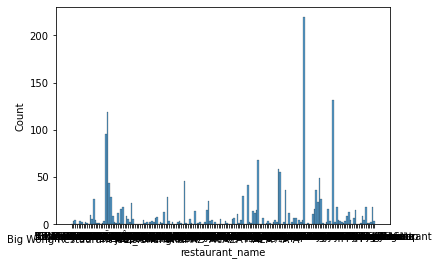

In [247]:
# Restaurants lets look at univariate distribution
sns.histplot(df.restaurant_name);

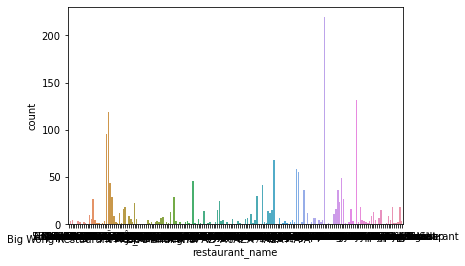

In [248]:
# another look same type of plot different function 
sns.countplot(data = df, x='restaurant_name');

#### Restaurants Observation
There are 178 unique restaurants participating
By far the data is NOT evenly distributed !
A few restaurants are a lot more popular than others as seen by value count of each restaurant

In [249]:
# Cousine Type EDA
print (" The number of cousines offered by Food Hub are ", df["cousine_type"].nunique())
print (" The types of cousines offered are by Food Hub are ", df["cousine_type"].unique())


 The number of cousines offered by Food Hub are  14
 The types of cousines offered are by Food Hub are  ['Korean', 'Japanese', 'Mexican', 'American', 'Indian', ..., 'Thai', 'Southern', 'French', 'Spanish', 'Vietnamese']
Length: 14
Categories (14, object): ['American', 'Chinese', 'French', 'Indian', ..., 'Southern', 'Spanish', 'Thai', 'Vietnamese']


In [250]:
# Cousine Types
# The count distribution of the cousines,in an another words popularity of each one is :
cousine_popularity=df.groupby(["cousine_type"])["order_id"].count().sort_values(ascending=False).reset_index()
cousine_popularity

,cousine_type,order_id
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77
5,Indian,73
6,Middle Eastern,49
7,Mediterranean,46
8,Thai,19
9,French,18


In [251]:
cousine_popularity.shape

(14, 2)

In [252]:
#sns.barplot(x="totalprod", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            #label="Total Production", color="b", ci=None)
plt.figure(figsize=(10, 7))
sns.countplot(data = df, y= df.cousine_type);
-

SyntaxError: invalid syntax (Temp/ipykernel_12348/2967726775.py, line 5)

#### Cousine Observation
Popularity of cousine is NOT evenly distributed.  By far American, Japanesee, Italian, Chinese and of course Indian :) food is more popular with customers than the rest..

In [ ]:
# Cost of Order
columns

In [ ]:
sns.distplot(df['cost_of_order'],color='hotpink')
plt.show()
sns.boxplot(y='cost_of_order',data=df)
plt.show()

In [ ]:
# Day of the Week
df.groupby(["day_of_the_week"])["order_id"].count().sort_values(ascending=False).reset_index()

### **Question 8**: Which are the top 5 restaurants in terms of the number of orders received? (1 mark)

In [ ]:
# Write the code here
#RESTAURANTS

df_top_restaurants=pd.DataFrame(df['restaurant_name']. value_counts(normalize=True).sort_values(ascending = False))
df_top_restaurants.rename(columns={'restaurant_name' : '% of  total orders'},inplace=True)


#print (" The top 5 restaurants and the % of their volume is ")
df_top_restaurants.head(5).T


# from the output below- clearly #Shake Shack is by far most frequent supplier of food with over 11% of total orders filled
# the top five are :

# Shake Shack
# The MeatBall Shop
# Blue Ribbon Sushi
# Blue Ribbon Fried Chicken
# Parm
            

#### Observations:
The popularity of restaurants is far from  evenly distributed.. There are  few key ones - out of 178.. !!!
This may be not just due to the quality of restaurant but by the type of food served as that is also not evenly distributed

In [ ]:
df.head(2)

Create a dataframe (this has not worked)
df_weekends=pd.DataFrame()

df_weekends["Weekend_col"]=0   # create a new column

Extract a list with orders only on weekend
for item in df.index:
       if 'Weekend' in df.loc[item, 'day_of_the_week']:
            df_weekends["Weekend_col"]="Weekend"
df

### Question 9: Find the most popular cuisine on weekends. (1 mark)

In [ ]:
# Write the code here


df_weekend=df[df["day_of_the_week"]=="Weekend"].reset_index(drop=True)
weekend_food=df_weekend.groupby("cousine_type")["order_id"].count().sort_values(ascending=False)
weekend_food



#### Observations:


### Question 10: Find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [ ]:
# Write the code here 
df_order_20=df[df["cost_of_order"]>20]
orders_20up=df_order_20["cost_of_order"].count()

print("The number of orders above $20 is ",orders_20up)
print( "the percentage of such orders as a total is {:.2f} %".format(orders_20up/df.shape[0]*100))


In [ ]:
# another method for the same is 
# number of orders above $20 is
df_order_20.shape[0]

#### Observations:

About 1/3 of the orders are above $20

### Question 11: Find the mean delivery time based on this dataset. (1 mark)

In [ ]:
# Write the code here

print (" The mean delivery time for the database is {:.2f} minutes".format(df['delivery_time'].mean()))
# also you could round like this round(df['delivery_time'].mean(),2)


#### Observations
The delivery time for orders over $20 is statistically the same as on average orders- difference being only 15 seconds

### Question 12: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [ ]:
# Write the code here

df.sort_values(by=['cost_of_order'], ascending=False).head(1)

# the other way to write it is 


In [ ]:
# another way to do this 
df[df["cost_of_order"] == df["cost_of_order"].max()]

#### Observations:

### Multivariate Analysis

### Question 13: Perform bivariate/multivariate analysis to explore relationships between the variables in the dataset. (7 marks)

In [ ]:
# check the average price of food across cousines
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x='cousine_type',y='cost_of_order');
# had barplot here before

#### Observation
French food is the most expensive on average, Vietnamese is the least expensive.
All, cousine types means seem to meet at least in  part same mean range with others ( they overlap)

In [ ]:

# plt.figure(figsize=(25,7))
sns.catplot(y="cousine_type",
               x = "cost_of_order", 
               data=df, 
               kind="box");

### Observation
In terms of price there are in general no outliers, except for Mediterianan and Korean, one for Korean. Mediteranian has a few high priced outliers and in fact the max() value above for an order is Mediteranian.. Further study needed if the order volume or item price is making the outlier - but am not sure if that is important anyway. It could be just a particular client that orders a lot :) and lowes mediteranian ..

Korean has outliers on both low and high end  ..
In general there are very fiew outliers  in terms of cost of order...



In [253]:
# Correlation
#High positive or negative correlation has a significance...
# While the relatioinship does not imply causation its important to identify what variables have  an impact on eachr ..
# hence enter the Heatmap
correlation=df.corr()



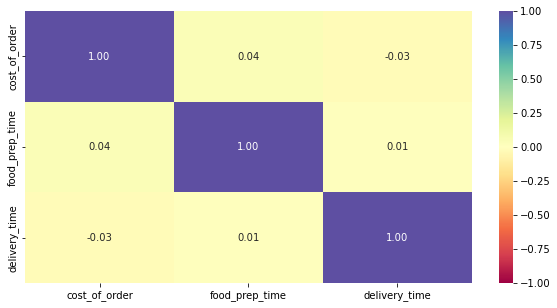

In [254]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observation
The correlation is only among numerical columns
It is clear that there is absolutely NO relationship between  delivery time, food prep time and cost  of order as one would expect.

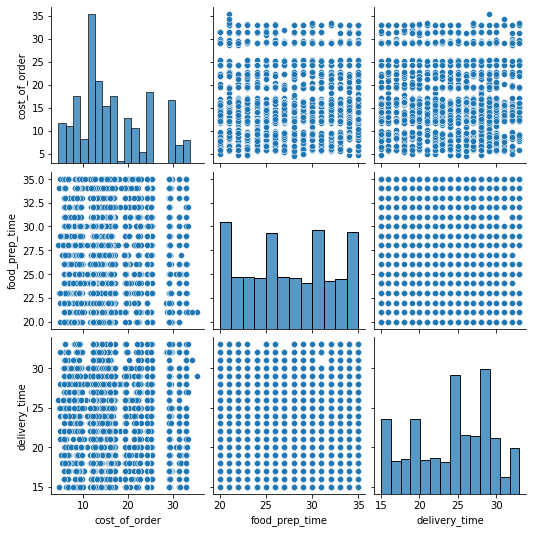

In [255]:
#sns.pairplot(df[['cousine_type', 'cost_of_order', 'delivery_time']]);

sns.pairplot(df)

### Observation 
We are limited on out analysis to 3 numerical columns- these confirm visually as in the heatmap, that there is no relationship 
between the numerical variables as there is no pattern to the above. 
The diagonal represents just the  var against itself hence its a histogram ..

## Categorical Vars
 Since there is no relationship beteeen numerical columns it males no sense  to scatterplot or jointplot
 moving on to categorical Vars to show data points distribution

In [ ]:
# Plot days of the week and delivery times
plt.figure(figsize=(10,5))
sns.countplot(data = df, x='delivery_time',hue='day_of_the_week');


#OBSERVATION - DELIVERY TIMES ARE  SHORTER ON WEEKENDS

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y='delivery_time',x="day_of_the_week", data=df)

In [ ]:
# Plot days of the week and food preparation time
plt.figure(figsize=(10,5))
sns.countplot(data = df, x='food_prep_time',hue='day_of_the_week');


#OBSERVATION - FOOD PREPARATION TIMES ARE THE SAME, BUT COUNT,HENCE NUMBER OF ORDERS IS MUCH HIGHER ON WEEKEND

In [ ]:
# Categorical vs Numerical plots
# Lets comparte how long on average it takes to food of a certain cousine
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="food_prep_time"   , y= "cousine_type");
# Observation - seems that its pretty similar  in terms of prep time, yet Italian & Thai takes longest with Korean and  French
#               being the quickest (Am surprised as French food is not fast food :), are they incuding French Fries ? hahaha)

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="food_prep_time", y="cousine_type", data=df.sort_values("food_prep_time", ascending=False),
            color="b", ci=None)

# OBSERVATION- THERE IS NOT MUCH DIFFERENCE BETWEEN FOOD PREPARATION TIMES ACROSS COUSINE TYPES

### Question 14: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [257]:
# Write the code here
# find restautants that have been rated at least 4 or 5

df_clean = df[(df["rating"]=="4") | (df["rating"]=="5")]
promo_list = df_clean.groupby("restaurant_name")["rating"].count().sort_values(ascending=False)
promo_list[promo_list>50]


restaurant_name
Shake Shack                  110
The Meatball Shop             74
Blue Ribbon Sushi             57
Blue Ribbon Fried Chicken     53
Name: rating, dtype: int64

In [258]:
# just for fun - how many are there 
df[(df["rating"]=="4") | (df["rating"]=="5")].shape[0]

974

#### Observations:
Out of 178 participting restaurants only 4 have 50 or more ratings.
Therefore, most of the good business is coming from these ..... important conclusion is to focus on these

### Question 15: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [259]:
# Write the code here
# make a list of orders above $5 and above $20
df_order_list_20 = df[df.cost_of_order>20].reset_index(drop=True)
profit_20up_orders = df_order_list_20.cost_of_order.sum()*0.25

# make a list  of orders that are between 5 and 20 (excluding5 but including 20)
df_order_list_5 = df[(df["cost_of_order"]>5) & (df["cost_of_order"]<=20)].reset_index(drop=True)
profit_5up_orders = df_order_list_20.cost_of_order.sum()*0.15

print("  The net revenue generated by orders between $5 and $20 is {:.2f}".format(profit_5up_orders))
print("  The net revenue generated by orders above $20 is {:.2f}".format(profit_20up_orders))

print("  The Total Net revenue generated is ${:.2f}".format(profit_20up_orders+profit_5up_orders))
#print(" Profit on orders above $20 is ${:.2f}".format(profit_20up_orders))
#df[["day_of_the_week","delivery_time"]].groupby(["day_of_the_week"]).mean()

  The net revenue generated by orders between $5 and $20 is 2213.24
  The net revenue generated by orders above $20 is 3688.73
  The Total Net revenue generated is $5901.96


#### Observations:

### Question 16: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [ ]:
# Write the code here
# find orders that have more than 60m delivery time, count() them and divide by total 
df.delivery_time.max() # problem is no orders are more than 60m as shown here but i  will write code anyway

print(" The longest delivery time in this dataset is",df.delivery_time.max())

a= int(input(" Please input here in minutes order delivery time to filter "))  # filter for any time thrershold you like
del_time_filter= df[df.delivery_time>=a] # filter for orders according to criteria
orders_filtered = del_time_filter.shape[0]

print(" There are {} orders that took {} minutes or more time, and its represents {:.2f}% of total".format(orders_filtered,a,orders_filtered/df.shape[0]*100))


#### Observations:



In [ ]:
There are no orders that take more than 60m in this dataset..
In fact the longest delivery orders are 33m...

Code has been written  that the desired delivery time filter can me input by user freely



### Question 17: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [ ]:
# Write the code here
orders_by_days=df.groupby(["day_of_the_week"])["order_id"].count().sort_values(ascending=False).reset_index()

df[["day_of_the_week","delivery_time"]].groupby(["day_of_the_week"]).mean()

#### Observations:
The weekend deliveries are quicker on average.
Probably more traffic on  weekdays or insufficient delivery personel.
Recommendation is to add staff on weekdays if we want to reduce delivery time

### Conclusion and Recommendations

### **Question 18:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

-Write the conclusions and recommendations here.
### Dataset
One can only draw good conclusions from data analysis limited by and only as good as, as the dataset. Hence a comment on dataset is warranted !

The dataset scrape was complete, with no missing values hence, no need for fillers..
Boxplots shoved very little  outliers hence we did not need to perform any mean or modes fillers for missing values and the set was representative of a real live scenation - hence real observations. 

### Cousine
Out of 14 cousines - only 5, American, Japanese, Italian, Chinese and Indian, dominate the number of orders. 
Hence for a bigger volume of transactions, I suggest Food Hub focus on acquiring additional suppliers ( restaurants)  consistent with cousine priorities of the public, and probably drop the bottom cousine suppliers such as Vietnamese or Korean.

### Ratings 
There are only 4 restaurants with ratings 4 or above and  frequency above 50....
Well, that certainly tells us who our most important suppliers (customers) are that are both popular( number of ratings) and with these ratings being high... Certainly we need to focus on these clients as well as seek to add restautants with profiles such as these clients.

Certailny its worthwhile to drop the low ratied suppliers, or ones that have little or no frequency (orders).

### Cost_of_Order
Food Hub makes money as a % of value of sales. Hence they should be focused on net highest sales value which is comprized of 2 components - cost_of_order and frequency of sale. 29% of orders are above $20.. we should certainly look further into the count of restaurants that make up these orders .... 

A good  additional study would be the study of frequency of orders grouped by restaurant...

Even a better study would be to check profitability per restaurant and focus on top of the list and drop the  bottom of the list... 
We could build a new column by frequency of orders * mean() of average sale grouped by restaurant and then we can see our top sales volume restaurants by a sort....also looking at the bottom is valid info as who we  Food Hub should be terminating its relationship with else addressing the issue with them...

But this was outside of the scope of the assignment ..

### Delivery_time

The  delivery time  is fairly tight and consistent... Potentially we could study delivery time per restaurant hence get an idea of the impact their location makes on timing of delivery ... but we had no outliers overall hence there is not change recommended .....

We could study delivery time and ratings or food prep time and ratings to see if there is a correlation ..

Weekeends delivery time is faster...Potentially to close the gap, with Weekdays, we could add more delivery people or look into more staff, else, adjust routes or form of transport used ...

### Food_prep_time
From the studies it seems the variance is small, hence food is being prepared consistently, no outliers present..
We could study if total time ( food prep time + delvery time) is correlated to restaurant or see if order frequency is correlated to lower times to see if its an important factor in customer decisions to order..

I would recommend a study to see if customers who order the most have a correlation with total time ( new var we can create)

### Customer_ID
While the numerical value of ID itself means nothing,its worth a study to see which customers have highest montly purchase (frequency plus order value) and reach out to them with incentives .......

### Day_of_the_Week
Certainly  Weekends are more important with 71\% of sales volume packed into 2 days....
Potentially Food Hub should study how to increase Weekday volumes with incentives, and insure resource capacities to handle higher volume such as redundand delivery persons  are available.
In case of special or extended weekends there should probably be that weekend volume capacity as well hence HOLIDAYS should be studies separately as a category in itself










